In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
import tensorflow as tf
import os

C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

Using TensorFlow backend.


In [4]:
#train = np.load("train_data.npy",allow_pickle = True)

In [5]:
#np.random.shuffle(train)

In [6]:
from random import shuffle

In [6]:
def load_images_from_folder():
    img_size = 224
    images = []
    image_paths = 'E:/Drowsiness/Data_CNN/train/alert/'
    for filename in os.listdir(image_paths):
        img = cv2.imread(os.path.join(image_paths,filename))
        if img is not None:
            img = cv2.resize(img,(img_size,img_size))
            images.append([np.array(img),[1,0]])
    
    image_paths = 'E:/Drowsiness/Data_CNN/train/drowsy/'
    for filename in os.listdir(image_paths):
        img = cv2.imread(os.path.join(image_paths,filename))
        if img is not None:
            img = cv2.resize(img,(img_size,img_size))
            images.append([np.array(img),[0,1]])
    shuffle(images)
    return images

In [7]:
train = load_images_from_folder()

In [8]:
train = np.array(train)

In [13]:
train.shape

(2562, 2)

In [11]:
X_train = np.array([i[0] for i in train]).reshape(-1,224,224,3)/255.

In [12]:
y_train = np.array([i[1] for i in train])

In [14]:
train = 0

In [15]:
datagen = ImageDataGenerator(rotation_range=30,width_shift_range=0.2)
datagen.fit(X_train)

X_train,y_train = datagen.flow(X_train, y_train, batch_size=32)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 20):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(224, 224, 3))
        plt.show()
    break

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
from keras import backend
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Dense, Flatten,Activation,Dropout
model = Sequential()
# Layer 1: Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu',))
# Layer 2: Pooling Layer
model.add(MaxPooling2D(pool_size=(3,3)))
# Layer 3: Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu',))
# Layer 4: Pooling Layer
model.add(MaxPooling2D(pool_size=(3,3)))
# Layer 5: Flatten Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(224,224,3), activation='relu',))

model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
# Layer 6: Dense Layer (Hidden Layer)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
# Layer 7: Dense Layer (Output Layer)
model.add(Dense(2, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [20]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
tf.debugging.set_log_device_placement(True)
model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32)

In [21]:
tf.debugging.set_log_device_placement(True)
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=20)


Epoch 1/20
65/64 [==============================] - 20s 302ms/step - loss: 0.7170 - accuracy: 0.5325
Epoch 2/20
65/64 [==============================] - 20s 300ms/step - loss: 0.6861 - accuracy: 0.5427
Epoch 3/20
65/64 [==============================] - 20s 307ms/step - loss: 0.6730 - accuracy: 0.5783
Epoch 4/20
65/64 [==============================] - 20s 301ms/step - loss: 0.6495 - accuracy: 0.5939
Epoch 5/20
65/64 [==============================] - 20s 301ms/step - loss: 0.6396 - accuracy: 0.6115
Epoch 6/20
65/64 [==============================] - 20s 302ms/step - loss: 0.6312 - accuracy: 0.6247
Epoch 7/20
65/64 [==============================] - 19s 298ms/step - loss: 0.6117 - accuracy: 0.6423
Epoch 8/20
65/64 [==============================] - 19s 300ms/step - loss: 0.5987 - accuracy: 0.6759
Epoch 9/20
65/64 [==============================] - 20s 309ms/step - loss: 0.5921 - accuracy: 0.6647
Epoch 10/20
65/64 [==============================] - 20s 305ms/step - loss: 0.5884 - accur

In [22]:
tf.debugging.set_log_device_placement(True)
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=20,
                    validation_data=(X_test,y_test))

Epoch 1/20
65/64 [==============================] - 21s 318ms/step - loss: 0.4030 - accuracy: 0.8038 - val_loss: 0.3178 - val_accuracy: 0.8694
Epoch 2/20
65/64 [==============================] - 20s 303ms/step - loss: 0.3538 - accuracy: 0.8477 - val_loss: 0.3169 - val_accuracy: 0.8733
Epoch 3/20
65/64 [==============================] - 20s 315ms/step - loss: 0.3058 - accuracy: 0.8629 - val_loss: 0.2280 - val_accuracy: 0.9025
Epoch 4/20
65/64 [==============================] - 20s 306ms/step - loss: 0.2554 - accuracy: 0.8965 - val_loss: 0.2131 - val_accuracy: 0.9084
Epoch 5/20
65/64 [==============================] - 20s 302ms/step - loss: 0.2427 - accuracy: 0.8985 - val_loss: 0.2225 - val_accuracy: 0.9064
Epoch 6/20
65/64 [==============================] - 20s 309ms/step - loss: 0.2279 - accuracy: 0.9043 - val_loss: 0.2594 - val_accuracy: 0.9103
Epoch 7/20
65/64 [==============================] - 21s 328ms/step - loss: 0.2475 - accuracy: 0.8990 - val_loss: 0.2382 - val_accuracy: 0.9045

In [23]:
tf.debugging.set_log_device_placement(True)
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=20,
                    validation_data=(X_test,y_test))

Epoch 1/20
65/64 [==============================] - 21s 324ms/step - loss: 0.1072 - accuracy: 0.9595 - val_loss: 0.1495 - val_accuracy: 0.9513
Epoch 2/20
65/64 [==============================] - 21s 327ms/step - loss: 0.1004 - accuracy: 0.9590 - val_loss: 0.1439 - val_accuracy: 0.9649
Epoch 3/20
65/64 [==============================] - 21s 327ms/step - loss: 0.0891 - accuracy: 0.9639 - val_loss: 0.1455 - val_accuracy: 0.9571
Epoch 4/20
65/64 [==============================] - 20s 310ms/step - loss: 0.1000 - accuracy: 0.9639 - val_loss: 0.1545 - val_accuracy: 0.9454
Epoch 5/20
65/64 [==============================] - 21s 329ms/step - loss: 0.1419 - accuracy: 0.9492 - val_loss: 0.1500 - val_accuracy: 0.9454
Epoch 6/20
65/64 [==============================] - 22s 346ms/step - loss: 0.1014 - accuracy: 0.9595 - val_loss: 0.1755 - val_accuracy: 0.9454
Epoch 7/20
65/64 [==============================] - 21s 327ms/step - loss: 0.0733 - accuracy: 0.9741 - val_loss: 0.1570 - val_accuracy: 0.9552

In [36]:
tf.debugging.set_log_device_placement(True)
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=20,
                    validation_data=(X_test,y_test))
model.save('CNN_Model_newData.h5')

Epoch 1/20
65/64 [==============================] - 21s 319ms/step - loss: 0.0488 - accuracy: 0.9790 - val_loss: 0.1631 - val_accuracy: 0.9708
Epoch 2/20
65/64 [==============================] - 20s 302ms/step - loss: 0.0596 - accuracy: 0.9756 - val_loss: 0.1484 - val_accuracy: 0.9630
Epoch 3/20
65/64 [==============================] - 20s 303ms/step - loss: 0.0701 - accuracy: 0.9736 - val_loss: 0.1453 - val_accuracy: 0.9649
Epoch 4/20
65/64 [==============================] - 20s 306ms/step - loss: 0.0518 - accuracy: 0.9829 - val_loss: 0.1664 - val_accuracy: 0.9630
Epoch 5/20
65/64 [==============================] - 21s 317ms/step - loss: 0.0575 - accuracy: 0.9810 - val_loss: 0.1583 - val_accuracy: 0.9591
Epoch 6/20
65/64 [==============================] - 20s 305ms/step - loss: 0.0515 - accuracy: 0.9805 - val_loss: 0.1734 - val_accuracy: 0.9688
Epoch 7/20
65/64 [==============================] - 21s 321ms/step - loss: 0.0587 - accuracy: 0.9761 - val_loss: 0.2291 - val_accuracy: 0.9454

In [44]:
tf.debugging.set_log_device_placement(True)
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=40,
                    validation_data=(X_test,y_test))
model.save('CNN_Model_newData.h5')

Epoch 1/40
65/64 [==============================] - 21s 325ms/step - loss: 0.0284 - accuracy: 0.9922 - val_loss: 0.1764 - val_accuracy: 0.9649
Epoch 2/40
65/64 [==============================] - 23s 349ms/step - loss: 0.0408 - accuracy: 0.9858 - val_loss: 0.1918 - val_accuracy: 0.9571
Epoch 3/40
65/64 [==============================] - 24s 372ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.1929 - val_accuracy: 0.9610
Epoch 4/40
65/64 [==============================] - 28s 427ms/step - loss: 0.0237 - accuracy: 0.9922 - val_loss: 0.1754 - val_accuracy: 0.9630
Epoch 5/40
65/64 [==============================] - 25s 387ms/step - loss: 0.2787 - accuracy: 0.8790 - val_loss: 0.2517 - val_accuracy: 0.9337
Epoch 6/40
65/64 [==============================] - 25s 378ms/step - loss: 0.0968 - accuracy: 0.9619 - val_loss: 0.2057 - val_accuracy: 0.9591
Epoch 7/40
65/64 [==============================] - 25s 385ms/step - loss: 0.0504 - accuracy: 0.9849 - val_loss: 0.1917 - val_accuracy: 0.9649

tf.debugging.set_log_device_placement(True)
model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32)

In [ ]:
#test = np.load("valid_data.npy",allow_pickle = True)

In [24]:
def load_images_from_folder_test():
    img_size = 224
    images = []
    image_paths = 'E:/Drowsiness/Data_CNN/test/alert/'
    for filename in os.listdir(image_paths):
        img = cv2.imread(os.path.join(image_paths,filename))
        if img is not None:
            img = cv2.resize(img,(img_size,img_size))
            images.append([np.array(img),[1,0]])
    
    image_paths = 'E:/Drowsiness/Data_CNN/test/drowsy/'
    for filename in os.listdir(image_paths):
        img = cv2.imread(os.path.join(image_paths,filename))
        if img is not None:
            img = cv2.resize(img,(img_size,img_size))
            images.append([np.array(img),[0,1]])
    shuffle(images)
    return images

In [25]:
test = load_images_from_folder_test()

In [26]:
#np.random.shuffle(test)

In [27]:
X_testt = np.array([i[0] for i in test]).reshape(-1,224,224,3)/255.

In [28]:
y_testt = np.array([i[1] for i in test])

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics

In [ ]:
metrics[['loss', 'val_loss']].plot()

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [45]:
model.evaluate(X_testt, y_testt, verbose=0)

[0.08059507715750087, 0.9748427867889404]

In [31]:
rounded_labels=np.argmax(y_testt, axis=1)
rounded_labels[1]

1

In [46]:
from sklearn.metrics import classification_report
prediction = model.predict_classes(X_testt)
print(classification_report(rounded_labels, prediction))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       338
           1       0.96      0.99      0.97       298

    accuracy                           0.97       636
   macro avg       0.97      0.98      0.97       636
weighted avg       0.98      0.97      0.97       636



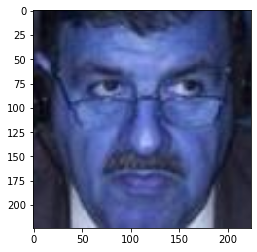

In [39]:
plt.imshow(X_testt[3])

In [40]:
rounded_labels[3]

0

In [47]:
from sklearn.metrics import confusion_matrix
prediction = model.predict_classes(X_testt)
confusion_matrix(rounded_labels, prediction)

array([[325,  13],
       [  3, 295]], dtype=int64)

In [ ]:
tf.debugging.set_log_device_placement(True)
model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32)

In [ ]:
prediction = model.predict_classes(X_testt)
confusion_matrix(rounded_labels, prediction)

In [ ]:
model.evaluate(X_testt, y_testt, verbose=0)

In [ ]:
prediction = model.predict_classes(X_testt)
print(classification_report(rounded_labels, prediction))

In [ ]:
tf.debugging.set_log_device_placement(True)
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=32)

model.save('CNN_Model_newData.h5')

In [ ]:
prediction = model.predict_classes(X_testt)
print(classification_report(rounded_labels, prediction))

In [7]:
model = load_model('CNN_Model_newData.h5')

In [ ]:
model.summary()

tf.debugging.set_log_device_placement(True)
model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32)

In [ ]:
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
while True:
    ret,frame = cap.read()
    thickness = 1
    color = (0, 0, 255)
    fontScale = 1
    org = (0, 185)
    font = cv2.FONT_HERSHEY_SIMPLEX
    if ret:
        #img.reshape(1,224,224,3)/255.
        faces = face_cascade.detectMultiScale(frame, 1.3, 5)
        if len(faces) == 0:
            #img = cv2.resize(frame,(224,224))
            print("not detected")
        else:
            
            face_crop = []
            for f in faces:
                x, y, w, h = [ v for v in f ]
                #cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 3)
                # Define the region of interest in the image  
                face_crop.append(frame[y:y+h, x:x+w])
            img = cv2.resize(face_crop[0],(224,224))
            pred = model.predict_classes(img.reshape(1,224,224,3)/255.)
            if pred == 0:
                text = 'Alert'
            elif pred == 1:
                text = 'Sleepy'

            
            frame = cv2.putText(frame, text, org, font, fontScale,  
                         color, thickness, cv2.LINE_AA, False)
        cv2.imshow("window_name", frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
        
        
        
    else:
        print("camera not found")
cv2.destroyAllWindows()
cap.release()

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected

In [1]:
cv2.destroyAllWindows()
cap.release()

NameError: name 'cv2' is not defined

In [ ]:
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)])

image = tf.expand_dims(image, 0)
plt.figure(figsize=(10, 10))

for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(frame)